In [1]:
import pandas as pd 
import collections 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 


from scipy.stats import ttest_ind 
import statsmodels.api as sm
from scipy.stats import chi2_contingency 
import scipy.stats as stats 

from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline 
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss 
from imblearn.metrics import classification_report_imbalanced 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report 
from collections import Counter 
from sklearn.model_selection import KFold, StratifiedKFold 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import cohen_kappa_score 

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) 


In [2]:

df= pd.read_csv('anemia.csv')

In [3]:
df.shape

(1421, 6)

In [4]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [5]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [6]:
df.shape

(1421, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [8]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

In [9]:
import numpy as np

print(df.isnull().values.sum())

df = df.replace(" ",np.NaN)

print(df.isnull().values.sum())



0
0


In [10]:
df_copy = df.copy()

df_copy['Result'] = df_copy['Result'].replace({0: 'Non Anemic', 1: 'Anemic'})
df_copy['Gender'] = df_copy['Gender'].replace({0: 'Male', 1: 'Female'})


custom_colors = ['#B43757', '#a37b85']
custom_colors_gender = ['#90ADC6', '#C6A990']


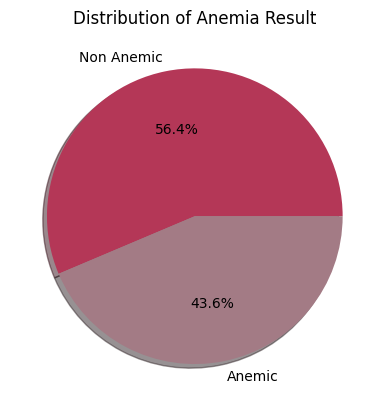

In [11]:
result_counts = df_copy['Result'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors, shadow=True)
plt.title('Distribution of Anemia Result')
plt.show()

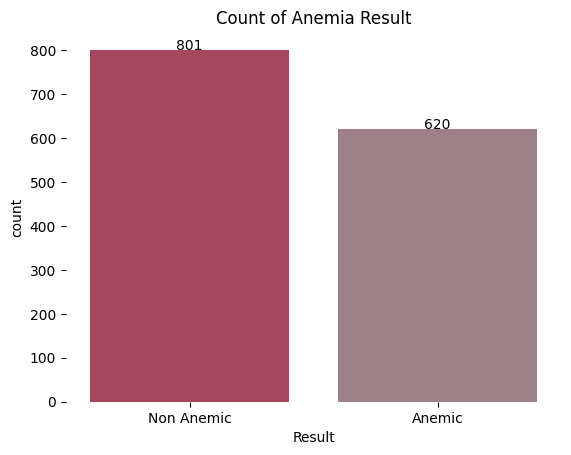

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Result', data=df_copy, palette=custom_colors)
plt.title('Count of Anemia Result')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.0f}'.format(p.get_height()), ha='center')

sns.despine(left=True, bottom=True)

plt.show()


In [15]:
result_counts = df_copy['Result'].value_counts()

print(result_counts)

if result_counts[0] == result_counts[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')
    
print("-----")    
print('Non Anemic', round(df['Result'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Anemic', round(df['Result'].value_counts()[1]/len(df) * 100,2), '% of the dataset')   
    

Result
Non Anemic    801
Anemic        620
Name: count, dtype: int64
The two categories are not balanced.
-----
Non Anemic 56.37 % of the dataset
Anemic 43.63 % of the dataset


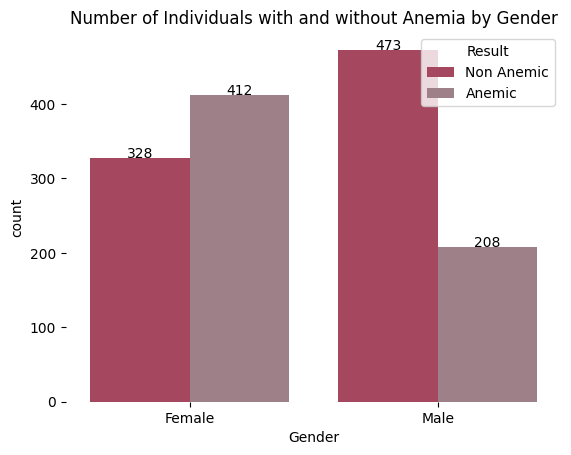

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Gender', hue='Result', data=df_copy, palette=custom_colors)
plt.title('Number of Individuals with and without Anemia by Gender')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.0f}'.format(p.get_height()), ha='center')

sns.despine(left=True, bottom=True)

plt.show()


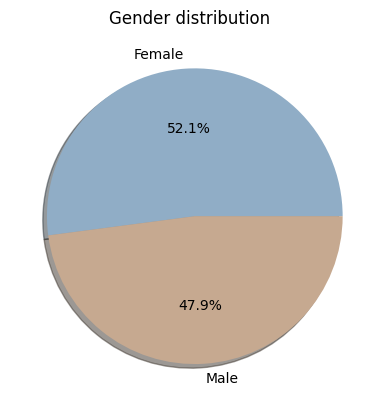

In [18]:
result_counts = df_copy['Gender'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors_gender, shadow=True)
plt.title('Gender distribution  ')
plt.show()

In [19]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [20]:
df_copy.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,Female,14.9,22.7,29.1,83.7,Non Anemic
1,Male,15.9,25.4,28.3,72.0,Non Anemic
2,Male,9.0,21.5,29.6,71.2,Anemic
3,Male,14.9,16.0,31.4,87.5,Non Anemic
4,Female,14.7,22.0,28.2,99.5,Non Anemic


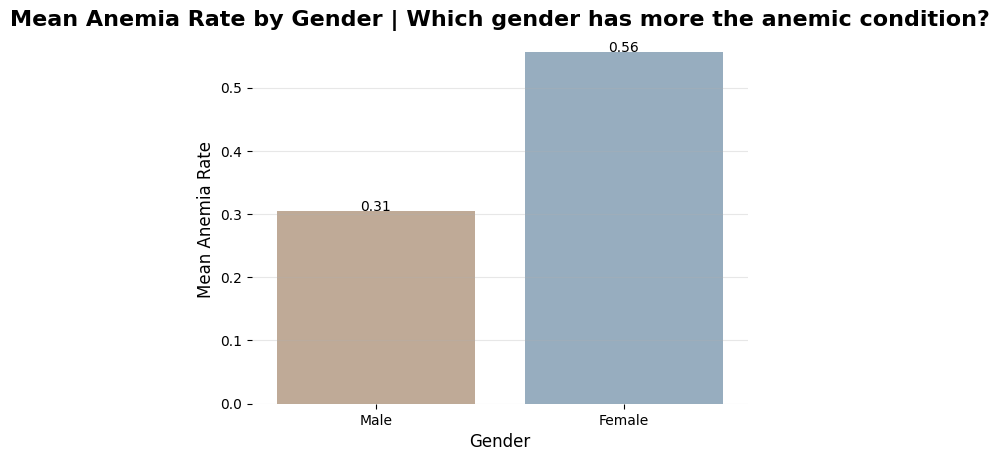

<Figure size 800x600 with 0 Axes>

In [21]:

color_gen = {1: '#90ADC6', 0: '#C6A990'}


anemia_rates = df.groupby('Gender')['Result'].mean().reset_index()


ax = sns.barplot(x='Gender', y='Result', data=anemia_rates, palette=color_gen)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), ha='center')
    ax.set_xticklabels(['Male', 'Female'])
    
plt.title('Mean Anemia Rate by Gender | Which gender has more the anemic condition?', fontsize=16, fontweight='bold')
plt.xlabel('Gender' , fontsize=12)
plt.ylabel('Mean Anemia Rate' , fontsize=12)

sns.despine(left=True, bottom=True)

plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

plt.figure(figsize=(8, 6))
plt.show()



In [22]:
anemia_rates = df.groupby('Gender')['Result'].mean().round(2)
anemia_rates

Gender
0    0.31
1    0.56
Name: Result, dtype: float64

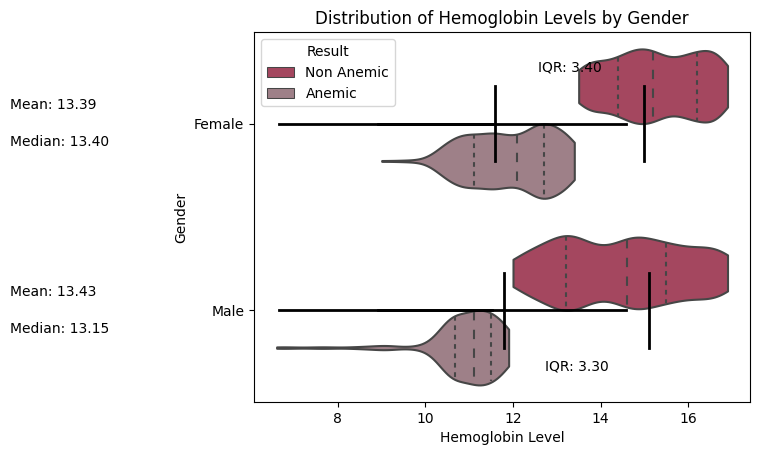

In [23]:
male_data = df_copy[df_copy['Gender'] == 'Male']
female_data = df_copy[df_copy['Gender'] == 'Female']

sns.violinplot(x='Hemoglobin', y='Gender', hue='Result', data=df_copy, palette=custom_colors, inner='quartile', scale='width', cut=0)

for i, group in enumerate([male_data, female_data]):
    median = group['Hemoglobin'].median()
    mean = group['Hemoglobin'].mean()
    plt.axhline(y=i, xmin=0.05, xmax=0.48, color='black', linewidth=2)
    plt.text(0.51, i+0.1, f'Median: {median:.2f}', ha='left', va='center')
    plt.text(0.51, i-0.1, f'Mean: {mean:.2f}', ha='left', va='center')

q1_male, q3_male = male_data['Hemoglobin'].quantile([0.25, 0.75])
q1_female, q3_female = female_data['Hemoglobin'].quantile([0.25, 0.75])
plt.axhline(y=0, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.axhline(y=1, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.plot([q1_male, q1_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q3_male, q3_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q1_female, q1_female], [0.8, 1.2], color='black', linewidth=2)
plt.plot([q3_female, q3_female], [0.8, 1.2], color='black', linewidth=2)
plt.text((q1_male+q3_male)/2, -0.3, f'IQR: {q3_male-q1_male:.2f}', ha='center', va='center')
plt.text((q1_female+q3_female)/2, 1.3, f'IQR: {q3_female-q1_female:.2f}', ha='center', va='center')

plt.title('Distribution of Hemoglobin Levels by Gender')
plt.xlabel('Hemoglobin Level')
plt.ylabel('Gender')


plt.show()


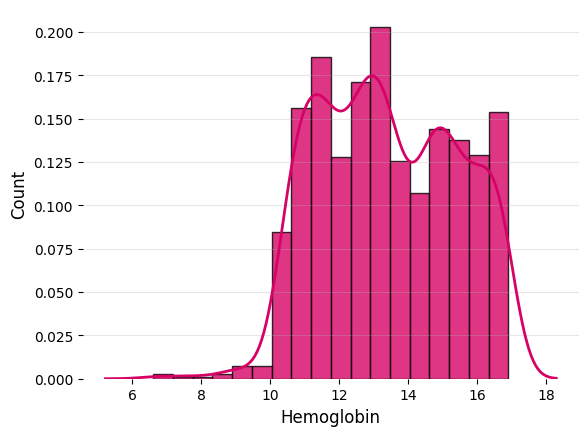

<Figure size 800x600 with 0 Axes>

In [24]:
iqr = np.percentile(df['Hemoglobin'], 75) - np.percentile(df['Hemoglobin'], 25)

bin_width = 2 * iqr / (len(df)**(1/3))
                       
sns.distplot(df['Hemoglobin'], hist=True, kde=True, 
             bins=int(round((df['Hemoglobin'].max() - df['Hemoglobin'].min()) / bin_width)),
             color='#d60266',
             hist_kws={'edgecolor':'black', 'alpha': 0.8},
             kde_kws={'linewidth': 2})

plt.xlabel('Hemoglobin', fontsize=12)
plt.ylabel('Count', fontsize=12)

sns.despine(left=True, bottom=True)

plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)


plt.figure(figsize=(8, 6))
plt.show()




In [25]:
skewness = stats.skew(df['Hemoglobin'])

kurtosis = stats.kurtosis(df['Hemoglobin'], fisher=False)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.022721507912660675
Kurtosis: 2.1042580924983616


In [26]:
hemoglobin_data = {'Metric': ['Highest Hemoglobin Level', 'Average Hemoglobin Level', 'Lowest Hemoglobin Level'],
                   'Value': [df['Hemoglobin'].max(), df['Hemoglobin'].mean(), df['Hemoglobin'].min()]}

hemoglobin_table = pd.DataFrame(hemoglobin_data)

styled_table = (hemoglobin_table.style
                .set_caption('Hemoglobin Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
display(styled_table)


,Metric,Value
0,Highest Hemoglobin Level,16.90
1,Average Hemoglobin Level,13.41
2,Lowest Hemoglobin Level,6.60


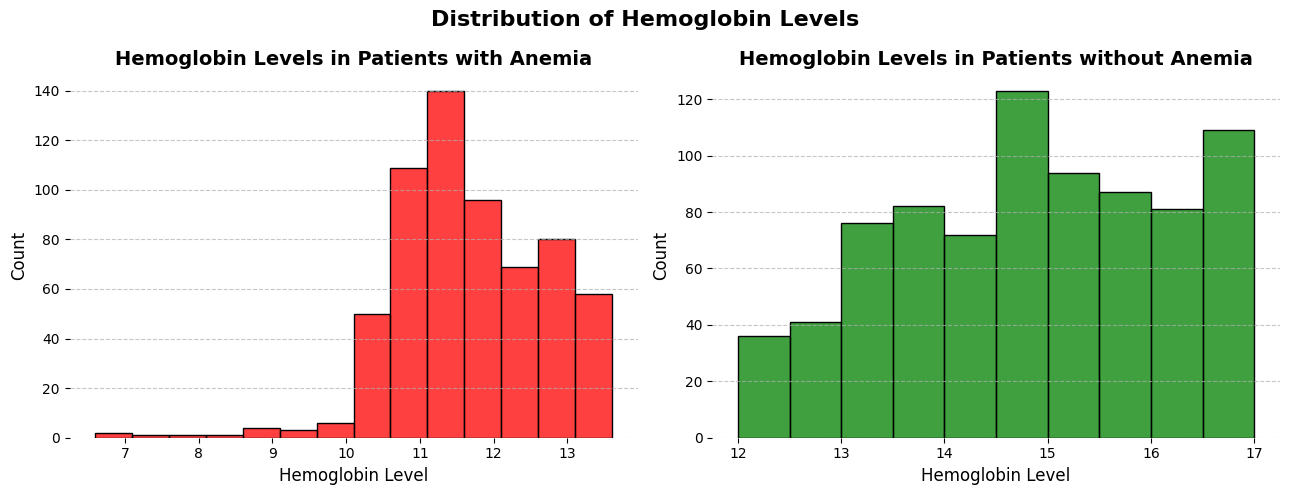

In [27]:
anemia_data = df[df['Result'] == 1]
no_anemia_data = df[df['Result'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.histplot(anemia_data, x='Hemoglobin', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(no_anemia_data, x='Hemoglobin', ax=ax2, color='green',  binwidth=0.5)

ax1.set_title('Hemoglobin Levels in Patients with Anemia', fontsize=14, fontweight='bold')
ax2.set_title('Hemoglobin Levels in Patients without Anemia', fontsize=14, fontweight='bold')
fig.suptitle('Distribution of Hemoglobin Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('Hemoglobin Level', fontsize=12)
ax2.set_xlabel('Hemoglobin Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()


In [28]:
MCH_data = {'Metric': ['Highest MCH Level', 'Average MCH Level', 'Lowest MCH Level'],
                   'Value': [df['MCH'].max(), df['MCH'].mean(), df['MCH'].min()]}

MCH_table = pd.DataFrame(MCH_data)

styled_table = (MCH_table.style
                .set_caption('MCH Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
display(styled_table)

,Metric,Value
0,Highest MCH Level,30.00
1,Average MCH Level,22.91
2,Lowest MCH Level,16.00


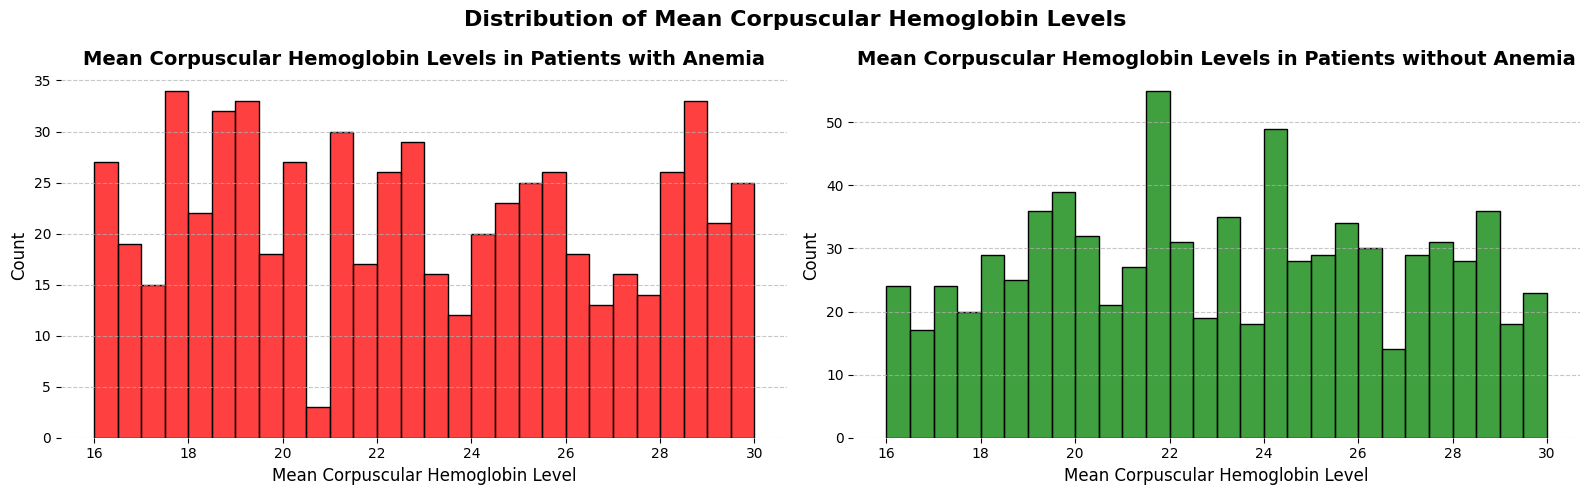

In [31]:
anemia_data = df[df['Result'] == 1]
no_anemia_data = df[df['Result'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

sns.histplot(anemia_data, x='MCH', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(no_anemia_data, x='MCH', ax=ax2, color='green',  binwidth=0.5)

ax1.set_title('Mean Corpuscular Hemoglobin Levels in Patients with Anemia', fontsize=14, fontweight='bold')
ax2.set_title('Mean Corpuscular Hemoglobin Levels in Patients without Anemia', fontsize=14, fontweight='bold')
fig.suptitle('Distribution of Mean Corpuscular Hemoglobin Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('Mean Corpuscular Hemoglobin Level', fontsize=12)
ax2.set_xlabel('Mean Corpuscular Hemoglobin Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

In [30]:
MCHC_data = {'Metric': ['Highest MCHC Level', 'Average MCHC Level', 'Lowest MCHC Level'],
                   'Value': [df['MCHC'].max(), df['MCHC'].mean(), df['MCHC'].min()]}

MCHC_table = pd.DataFrame(MCHC_data)

styled_table = (MCHC_table.style
                .set_caption('MCHC Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
display(styled_table)

,Metric,Value
0,Highest MCHC Level,32.50
1,Average MCHC Level,30.25
2,Lowest MCHC Level,27.80


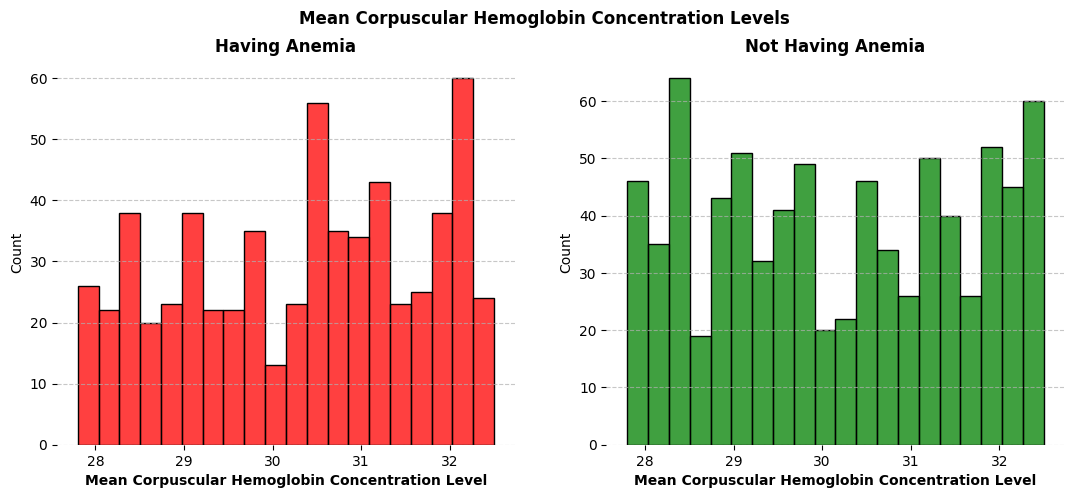

In [32]:
anemia_data = df[df['Result']==1]
no_anemia_data = df[df['Result']==0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.histplot(anemia_data, x='MCHC', ax=ax1, color='red', bins=20)
sns.histplot(no_anemia_data, x='MCHC', ax=ax2, color='green', bins=20)


ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)



ax1.set_title('Having Anemia', fontweight='bold')
ax2.set_title('Not Having Anemia', fontweight='bold')
fig.suptitle('Mean Corpuscular Hemoglobin Concentration Levels', fontweight='bold')
ax1.set_xlabel('Mean Corpuscular Hemoglobin Concentration Level', fontweight='bold')
ax2.set_xlabel('Mean Corpuscular Hemoglobin Concentration Level', fontweight='bold')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

sns.despine(left=True, bottom=True)

plt.show()


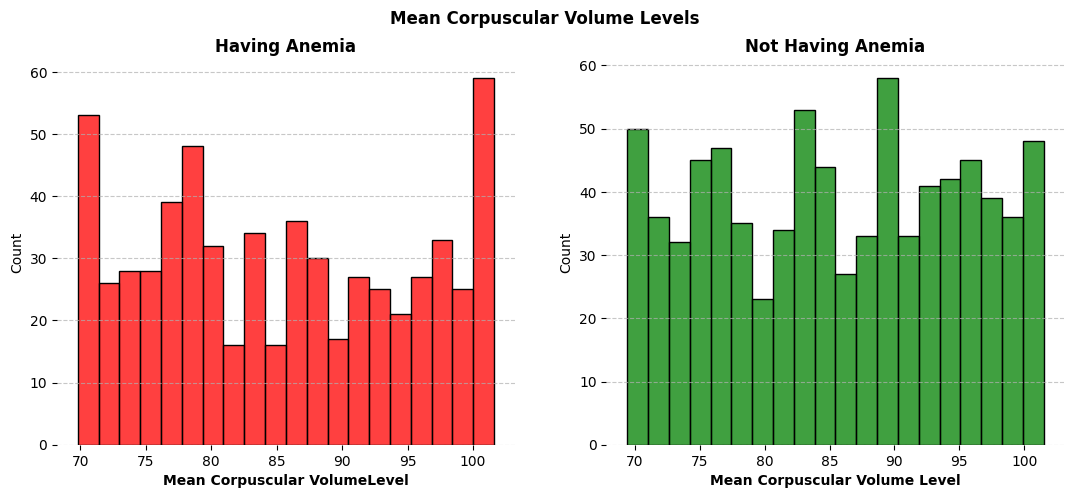

In [33]:
anemia_data = df[df['Result']==1]
no_anemia_data = df[df['Result']==0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.histplot(anemia_data, x='MCV', ax=ax1, color='red', bins=20)
sns.histplot(no_anemia_data, x='MCV', ax=ax2, color='green', bins=20)


ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)



ax1.set_title('Having Anemia', fontweight='bold')
ax2.set_title('Not Having Anemia',fontweight='bold' )
fig.suptitle('Mean Corpuscular Volume Levels',fontweight='bold')
ax1.set_xlabel('Mean Corpuscular VolumeLevel',fontweight='bold')
ax2.set_xlabel('Mean Corpuscular Volume Level',fontweight='bold')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

sns.despine(left=True, bottom=True)

plt.show()

In [34]:
MCV_data = {'Metric': ['Highest MCV Level', 'Average MCV Level', 'Lowest MCV Level'],
                   'Value': [df['MCV'].max(), df['MCV'].mean(), df['MCV'].min()]}

MCV_table = pd.DataFrame(MCV_data)

styled_table = (MCV_table.style
                .set_caption('MCV Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
display(styled_table)

,Metric,Value
0,Highest MCV Level,101.60
1,Average MCV Level,85.52
2,Lowest MCV Level,69.40


In [35]:
blood_data = {'Metric': ['Highest MCHC Level', 'Average MCHC Level', 'Lowest MCHC Level',
                         'Highest MCV Level', 'Average MCV Level', 'Lowest MCV Level',
                         'Highest MCH Level', 'Average MCH Level', 'Lowest MCH Level',
                         'Highest Hemoglobin Level', 'Average Hemoglobin Level', 'Lowest Hemoglobin Level'],
              'Value': [df['MCHC'].max(), df['MCHC'].mean(), df['MCHC'].min(),
                        df['MCV'].max(), df['MCV'].mean(), df['MCV'].min(),
                        df['MCH'].max(), df['MCH'].mean(), df['MCH'].min(),
                        df['Hemoglobin'].max(), df['Hemoglobin'].mean(), df['Hemoglobin'].min()]}

blood_table = pd.DataFrame(blood_data)

styled_table = (blood_table.style
                .set_caption('Blood Test Results')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',                                    'props': [('font-size', '18px'),                                              ('font-weight', 'bold'),                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
display(styled_table)


,Metric,Value
0,Highest MCHC Level,32.50
1,Average MCHC Level,30.25
2,Lowest MCHC Level,27.80
3,Highest MCV Level,101.60
4,Average MCV Level,85.52
5,Lowest MCV Level,69.40
6,Highest MCH Level,30.00
7,Average MCH Level,22.91
8,Lowest MCH Level,16.00
9,Highest Hemoglobin Level,16.90


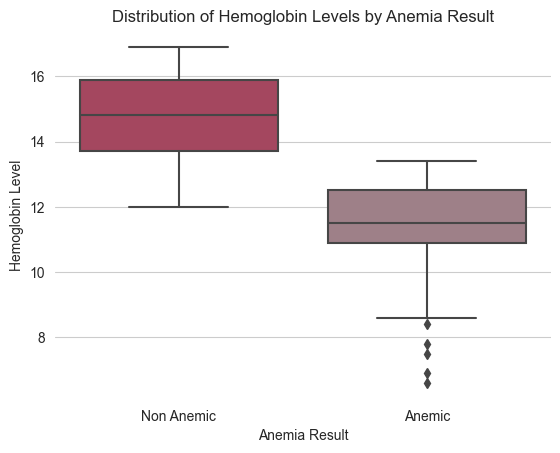

In [36]:
sns.set_style("whitegrid")
sns.boxplot(x='Result', y='Hemoglobin', data=df_copy, palette=custom_colors)
plt.title('Distribution of Hemoglobin Levels by Anemia Result')
plt.xlabel('Anemia Result')
plt.ylabel('Hemoglobin Level')


sns.despine(left=True, bottom=True)
plt.show()


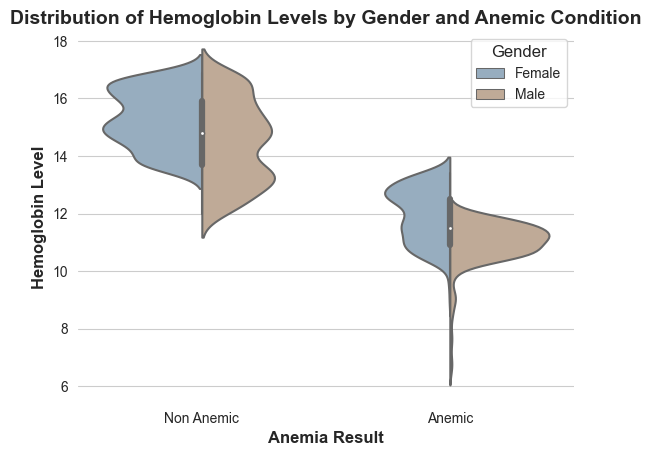

In [37]:
ax = sns.violinplot(x='Result', y='Hemoglobin', hue='Gender', data=df_copy, palette=custom_colors_gender, split=True)

ax.set_title('Distribution of Hemoglobin Levels by Gender and Anemic Condition', fontsize=14, fontweight='bold')
ax.set_xlabel('Anemia Result', fontsize=12, fontweight='bold')
ax.set_ylabel('Hemoglobin Level', fontsize=12, fontweight='bold')

ax.legend(title='Gender', title_fontsize=12, fontsize=10, loc='upper right')

sns.despine(left=True, bottom=True)

plt.show()


In [38]:
df[['Gender','Hemoglobin','Result', 'MCH', 'MCV', 'MCHC']].corr()['Result'].sort_values(ascending=False).head(10)

Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

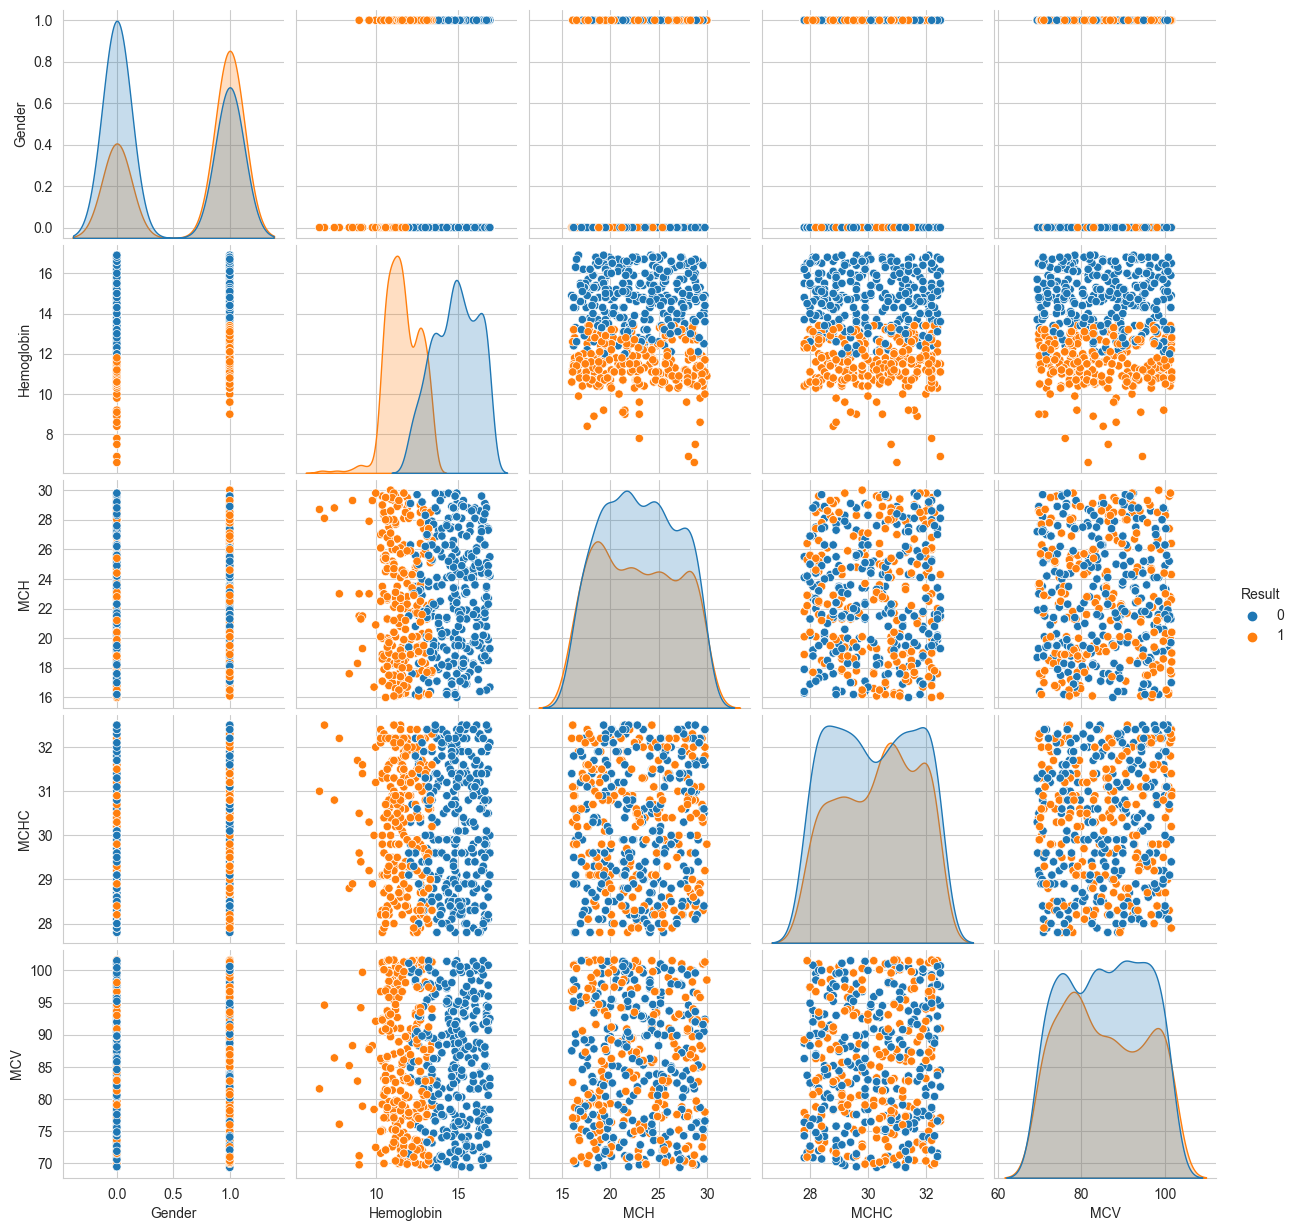

In [39]:
sns.pairplot(df,hue='Result')

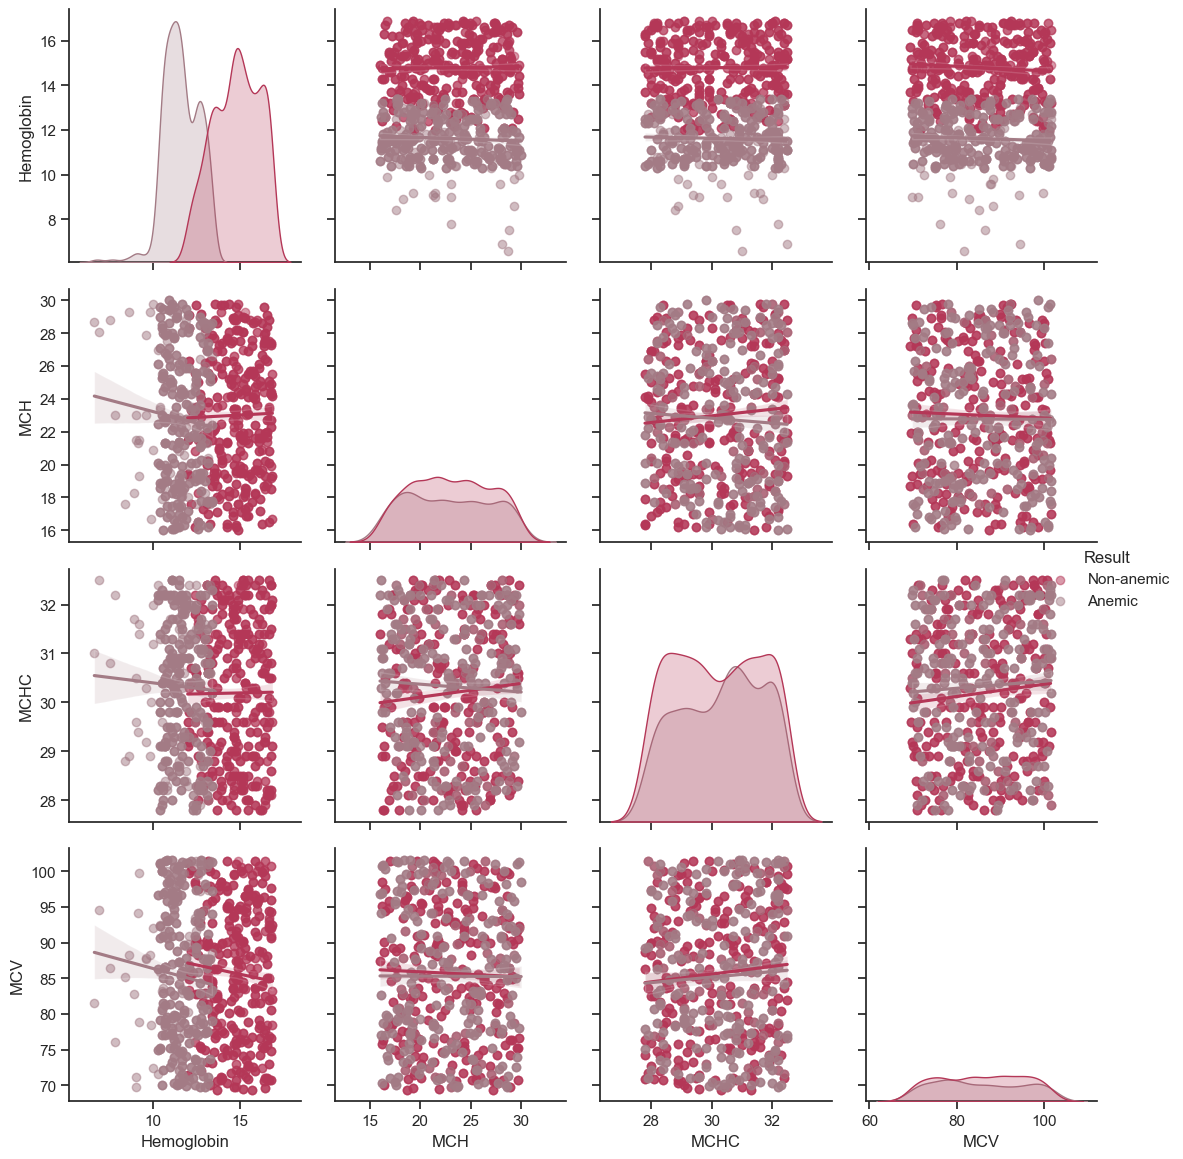

In [40]:
sns.set(style="ticks")

RELATIONS_COLS = ["Hemoglobin", "MCH", "MCHC","MCV"]

g = sns.PairGrid(data=df, vars=RELATIONS_COLS, hue="Result", palette=custom_colors)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.regplot, scatter_kws={'alpha':0.5})
g.add_legend(title="Result")
legend = g._legend

g.fig.set_size_inches(12, 12)

new_labels = ['Non-anemic', 'Anemic']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [41]:
df_stat = df.copy()
df_stat.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [42]:
male_hemoglobin = df_stat.loc[df_stat['Gender'] == 0, 'Hemoglobin']
female_hemoglobin = df_stat.loc[df_stat['Gender'] == 1, 'Hemoglobin']

t_statistic, p_value = ttest_ind(male_hemoglobin, female_hemoglobin)

print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))

if p_value < 0.05:
    print("Reject null hypothesis: Gender has an impact on hemoglobin levels.")
else:
    print("Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.")

T-Statistic: -0.41
P-Value: 0.679
Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.


In [43]:
df_stat['is_female'] = np.where(df_stat['Gender'] == 1, 1, 0)
df_stat['is_anemic'] = np.where(df_stat['Result'] == 1, 1, 0)

logit_model = sm.Logit(df_stat['is_anemic'], sm.add_constant(df_stat['is_female']))
result = logit_model.fit()

print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))

Optimization terminated successfully.
         Current function value: 0.652524
         Iterations 5
Odds Ratio for Gender: 2.86


In [44]:
cont_table = pd.crosstab(df_stat['Gender'], df_stat['Result'])

chi2_statistic, p_value, dof, expected = chi2_contingency(cont_table)

print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

if p_value < 0.05:
    print("Reject null hypothesis: Gender and anemia status are dependent.")
else:
    print("Fail to reject null hypothesis: Gender and anemia status are independent.")

Chi-Square Statistic: 90.06
P-Value: 0.000
Reject null hypothesis: Gender and anemia status are dependent.


In [45]:
df[['Gender','Hemoglobin','Result', 'MCH', 'MCV', 'MCHC']].corr()['Result'].sort_values(ascending=False).head(10)

Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

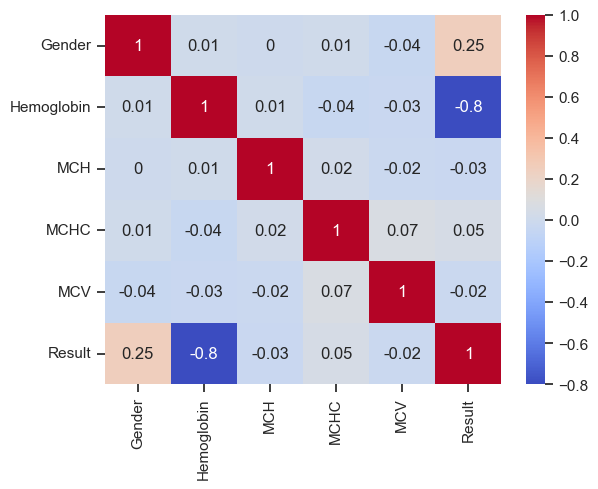

In [46]:
corr_matrix = df.corr().round(2)

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


In [47]:
import numpy as np
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = df.iloc[:,0:5]
y = df.iloc[:,5] 

k_values = [2, 3, 4, 5]  
best_k = 0  
best_score = 0 

for k in k_values:
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(X, y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs','Score']  

    if featureScores['Score'].sum() > best_score:
        best_score = featureScores['Score'].sum()
        best_k = k

print(f"The best value of K is {best_k} with score {best_score}.")

print("---")
print(featureScores)
print("---")
print(featureScores.nlargest(3,'Score'))  

The best value of K is 2 with score 307.0244798773883.
---
        Specs       Score
0      Gender   43.648385
1  Hemoglobin  261.707512
2         MCH    0.803292
3        MCHC    0.212839
4         MCV    0.652452
---
        Specs       Score
1  Hemoglobin  261.707512
0      Gender   43.648385
2         MCH    0.803292


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [49]:
print(model.feature_importances_) 

[0.08029746 0.74198319 0.05979378 0.0558756  0.06204997]


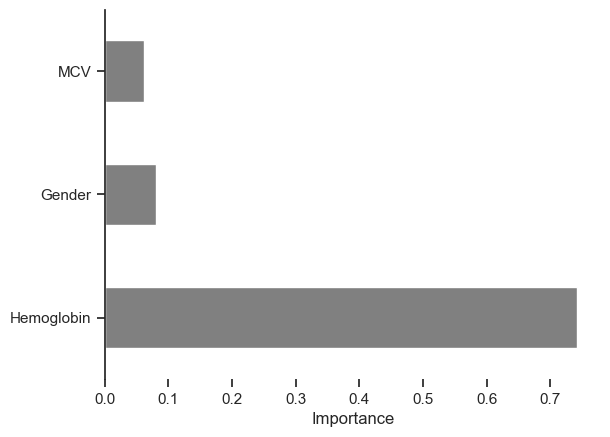

<Figure size 640x480 with 0 Axes>

In [50]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(3).plot(kind='barh', color='#808080')
plt.xlabel('Importance')
sns.despine(left=False, bottom=True)
plt.show()
plt.savefig('Top2Feature.jpg')

In [51]:
df['Hemoglobin_log'] = np.log(df.Hemoglobin + 0.01)

In [52]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler() 
df['Hemoglobin_scaled'] = ss.fit_transform(df['Hemoglobin'].values.reshape(-1,1))

In [53]:
from sklearn.preprocessing import MinMaxScaler

df['Hemoglobin_minmax'] = mm.fit_transform(df['Hemoglobin'].values.reshape(-1,1))

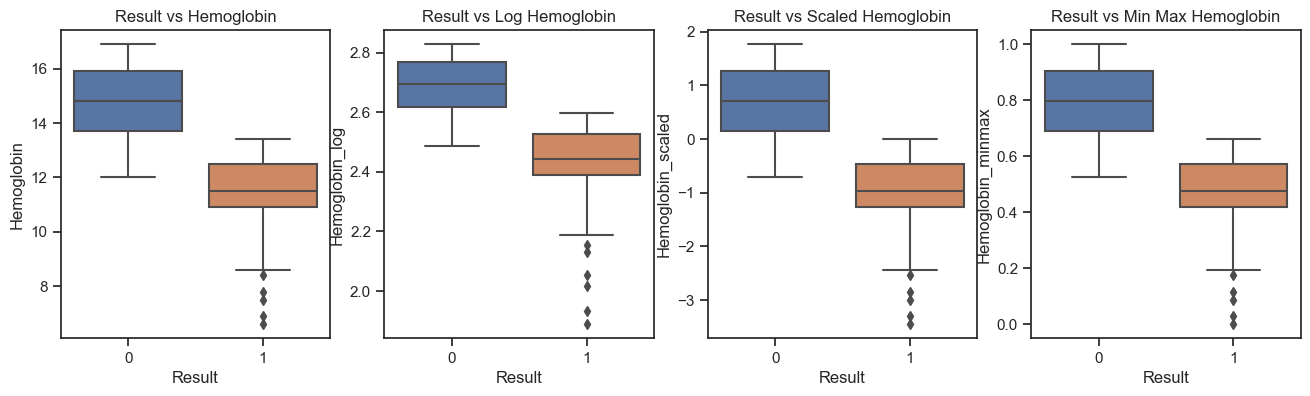

In [54]:
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Result",y="Hemoglobin",data=df, ax = axs[0])
axs[0].set_title("Result vs Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_log",data=df, ax = axs[1])
axs[1].set_title("Result vs Log Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_scaled",data=df, ax = axs[2])
axs[2].set_title("Result vs Scaled Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_minmax",data=df, ax = axs[3])
axs[3].set_title("Result vs Min Max Hemoglobin")

plt.show()

In [55]:
Q1 = df['Hemoglobin_log'].quantile(0.25)
Q3 = df['Hemoglobin_log'].quantile(0.75)
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 2.460443177609626
Q3: 2.7087166456453704
IQR: 0.24827346803574457


In [56]:
Q1 = df['Hemoglobin_scaled'].quantile(0.25)
Q3 = df['Hemoglobin_scaled'].quantile(0.75)
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: -0.8677137764190042
Q3: 0.8041451321854968
IQR: 1.6718589086045008


In [57]:
Q1 = df['Hemoglobin_minmax'].quantile(0.25)
Q3 = df['Hemoglobin_minmax'].quantile(0.75)
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 0.4951456310679613
Q3: 0.8155339805825245
IQR: 0.3203883495145632


In [58]:
Q1 = df['Hemoglobin'].quantile(0.25)
Q3 = df['Hemoglobin'].quantile(0.75)
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 11.7
Q3: 15.0
IQR: 3.3000000000000007


In [59]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result',
       'Hemoglobin_log', 'Hemoglobin_scaled', 'Hemoglobin_minmax'],
      dtype='object')

In [60]:
X = df.drop(['MCHC','Hemoglobin_log', 'Hemoglobin_scaled', 'Hemoglobin_minmax', 'Result', 'MCH'],axis=1)
y = df['Result']

In [61]:
X

,Gender,Hemoglobin,MCV
0,1,14.9,83.7
1,0,15.9,72.0
2,0,9.0,71.2
3,0,14.9,87.5
4,1,14.7,99.5
...,...,...,...
1416,0,10.6,82.9
1417,1,12.1,86.9
1418,1,13.1,80.7
1419,0,14.3,95.2


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [63]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (994, 3)
y_train -  (994,)
X_test -  (427, 3)
y_test -  (427,)


In [65]:
from sklearn.linear_model import LogisticRegression 

In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [67]:
y_pred = logreg.predict(X_test)

In [68]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       246
           1       0.99      1.00      0.99       181

    accuracy                           1.00       427
   macro avg       0.99      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



In [69]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
print("\n")

Accuracy :0.99532
AUC : 0.99593
Precision : 0.98907
Recall : 1.00000
F1 : 0.99451




In [70]:
pd.Series(y_pred).value_counts()

0    244
1    183
Name: count, dtype: int64

In [71]:
pd.Series(y_test).value_counts()

Result
0    246
1    181
Name: count, dtype: int64

In [72]:
183/181

1.011049723756906

In [73]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[244,   2],
       [  0, 181]], dtype=int64)

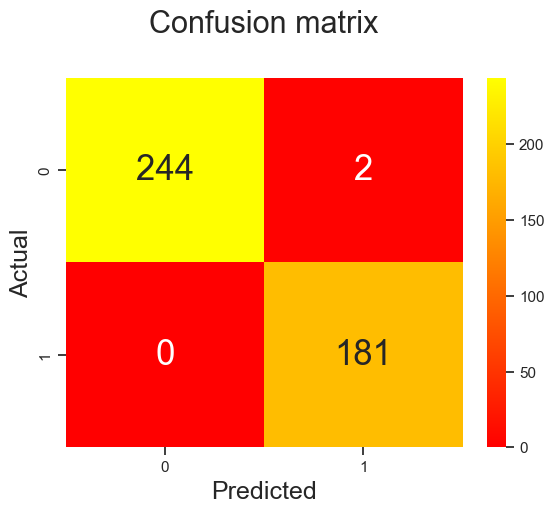

In [74]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

plt.show()

In [75]:
181/181

1.0

In [76]:
metrics.roc_auc_score(y_test , y_pred) 

0.9959349593495934

In [77]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99794739e-01, 2.05261035e-04],
       [9.99999997e-01, 2.58194908e-09],
       [9.99567014e-01, 4.32986485e-04],
       [9.99999755e-01, 2.44749155e-07],
       [9.84250342e-01, 1.57496575e-02],
       [7.80834399e-05, 9.99921917e-01],
       [4.53607253e-02, 9.54639275e-01],
       [9.99999968e-01, 3.23168465e-08],
       [4.43675401e-02, 9.55632460e-01],
       [9.99292179e-01, 7.07821458e-04],
       [7.98620008e-04, 9.99201380e-01],
       [1.15037011e-06, 9.99998850e-01],
       [4.35795822e-01, 5.64204178e-01],
       [8.23943404e-01, 1.76056596e-01],
       [1.40233774e-02, 9.85976623e-01],
       [2.29128713e-02, 9.77087129e-01],
       [9.99999586e-01, 4.14370940e-07],
       [9.99999643e-01, 3.56731195e-07],
       [3.56410833e-04, 9.99643589e-01],
       [9.99480643e-01, 5.19356919e-04],
       [9.99983033e-01, 1.69665446e-05],
       [9.99999605e-01, 3.95439358e-07],
       [6.08308932e-02, 9.39169107e-01],
       [9.99999294e-01, 7.05791732e-07],
       [9.586409

AUC -  0.9959349593495934 



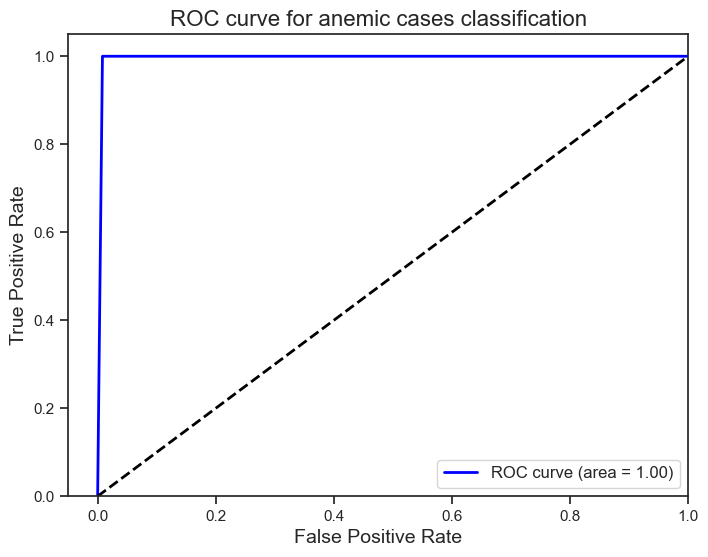

In [78]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve for anemic cases classification', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()


f1=0.995


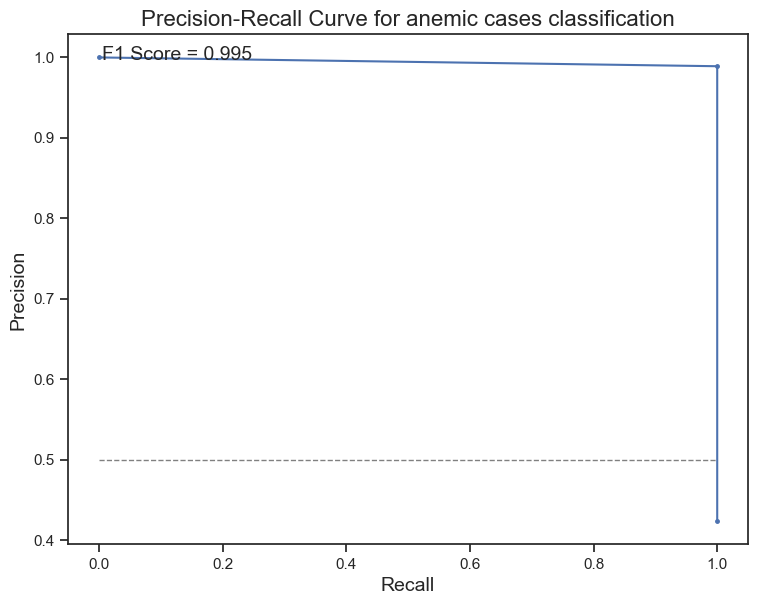

In [79]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)

ax.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray', lw=1)

ax.plot(recall, precision, marker='.', markersize=5)

ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision-Recall Curve for anemic cases classification', fontsize=16)

ax.text(0.05, 0.95, f'F1 Score = {f1:.3f}', transform=ax.transAxes, fontsize=14)

plt.show()


In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [81]:
from collections import Counter 
from sklearn.datasets import make_classification



In [82]:
print('Original dataset shape %s' % Counter(y_train))

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 555, 1: 439})
Resampled dataset shape Counter({0: 439, 1: 439})


In [83]:
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [84]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_rus)))

Accuracy :0.99297
AUC : 0.99390
Precision : 0.98370
Recall : 1.00000
F1 : 0.99178
Kappa Statistic : 0.98565


AUC -  0.9939024390243902 



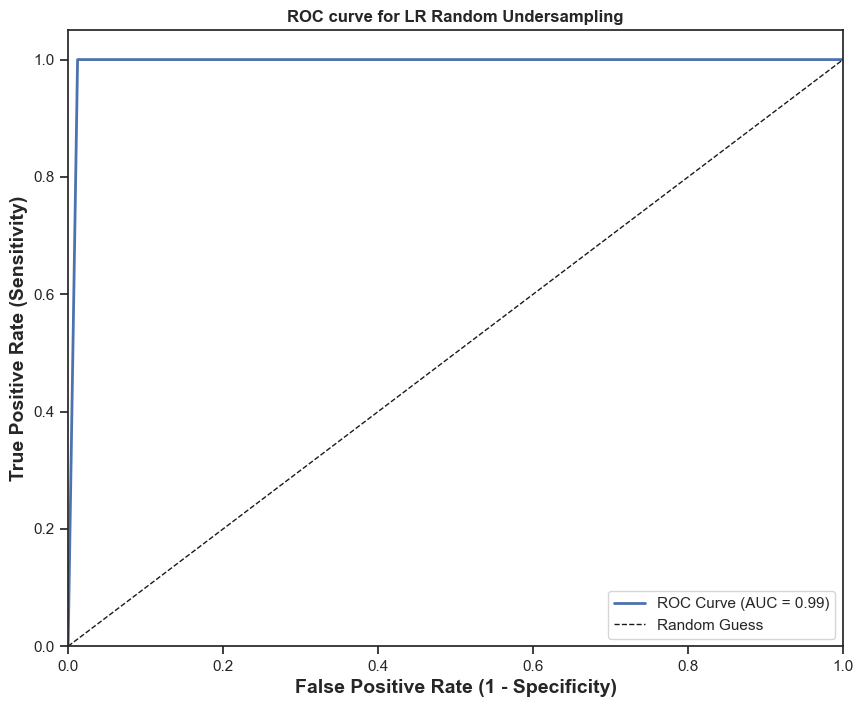

In [85]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Undersampling', fontsize=12, fontweight='bold')

plt.legend(loc="lower right")

plt.show()


f1=0.992


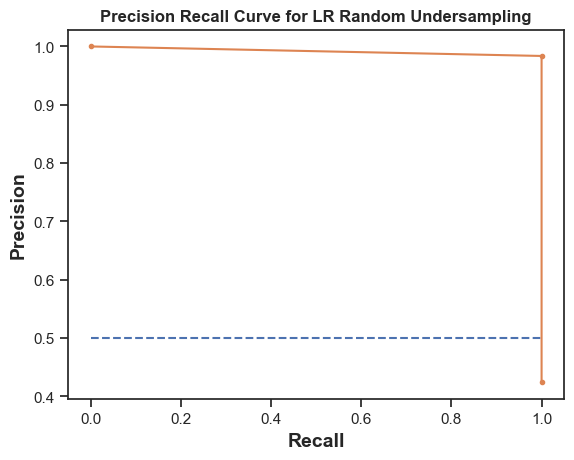

In [86]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')

plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Undersampling', fontsize=12, fontweight='bold')

plt.show()

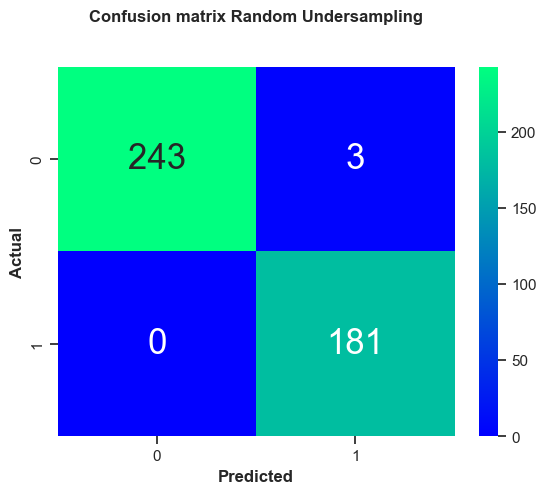

In [87]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix Random Undersampling', y=1.1, fontsize = 12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12, fontweight='bold')
plt.ylabel('Actual',fontsize = 12, fontweight='bold')
plt.show()

In [88]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 555, 1: 439})
Resampled dataset shape Counter({1: 555, 0: 555})


In [89]:
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [90]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_ros)))


Accuracy :0.99297
AUC : 0.99390
Precision : 0.98370
Recall : 1.00000
F1 : 0.99178
Kappa Statistic : 0.98565


AUC -  0.9939024390243902 



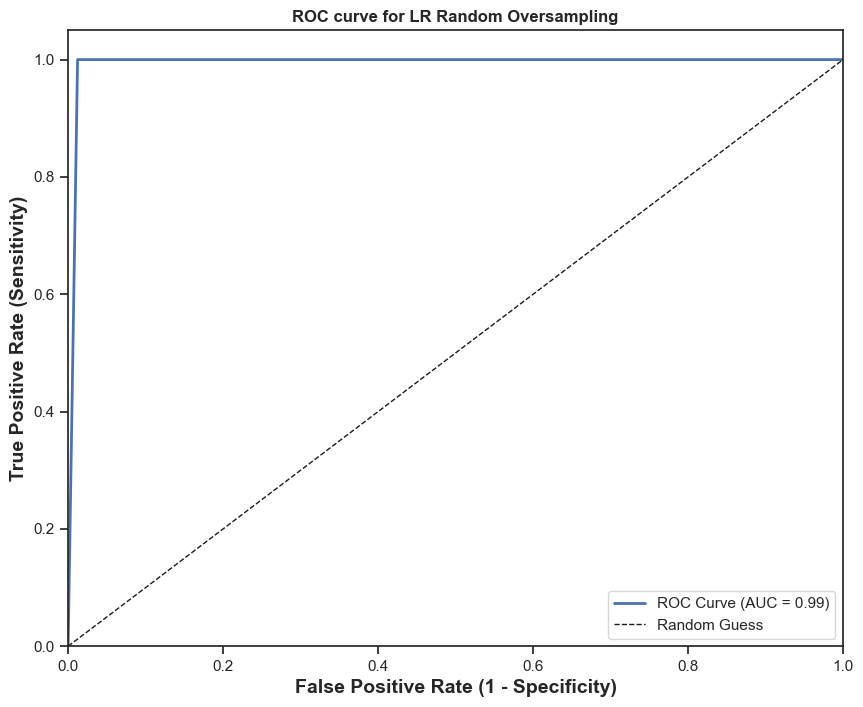

In [91]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Oversampling', fontsize=12, fontweight='bold')

plt.legend(loc="lower right")

plt.show()


f1=0.992


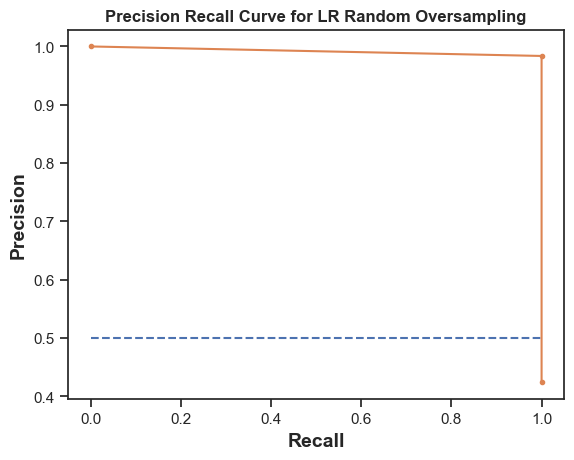

In [92]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')


plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Oversampling', fontsize=12, fontweight='bold')

plt.show()

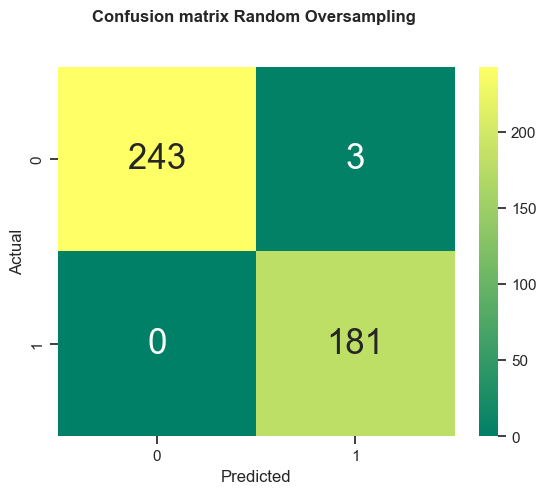

In [93]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="summer" ,fmt='g')

plt.title('Confusion matrix Random Oversampling ', y=1.1,  fontsize=12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)

plt.show()

In [94]:
from imblearn.over_sampling import SMOTE, ADASYN


print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 555, 1: 439})
Resampled dataset shape Counter({1: 555, 0: 555})


In [95]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [96]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_smote)))

Accuracy :0.99063
AUC : 0.99187
Precision : 0.97838
Recall : 1.00000
F1 : 0.98907
Kappa Statistic : 0.98088


AUC -  0.9918699186991871 



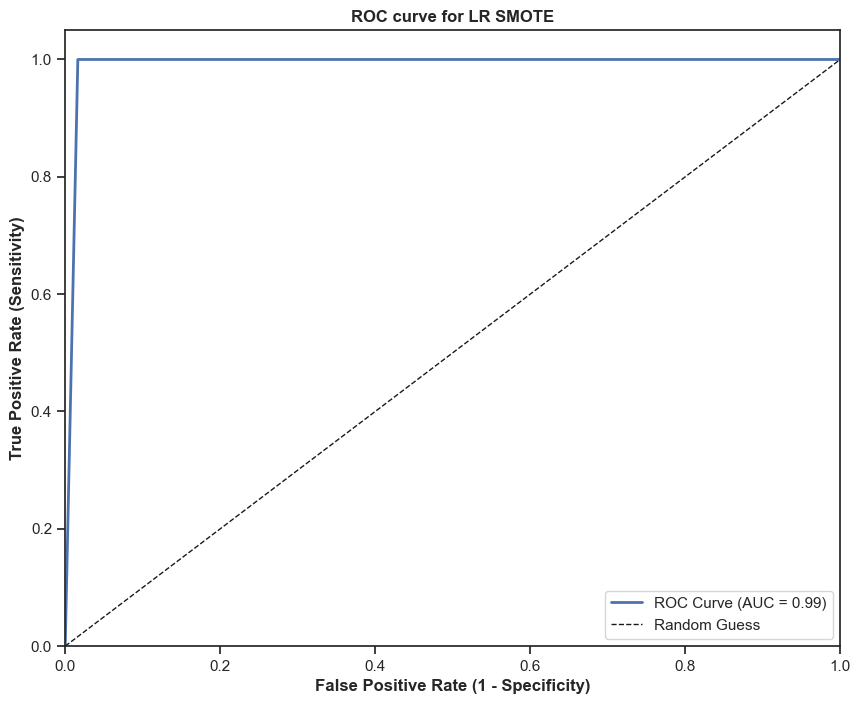

In [97]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.xlabel('False Positive Rate (1 - Specificity)',  fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)',  fontsize=12, fontweight='bold')
plt.title('ROC curve for LR SMOTE',  fontsize=12, fontweight='bold')

plt.legend(loc="lower right")

plt.show()


f1=0.989


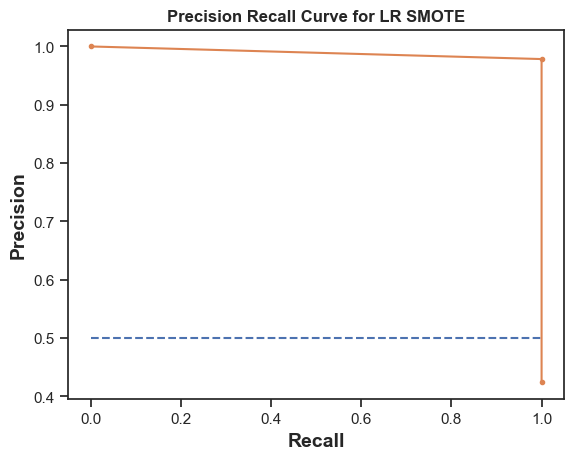

In [98]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')

plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR SMOTE', fontsize=12, fontweight='bold')

plt.show()

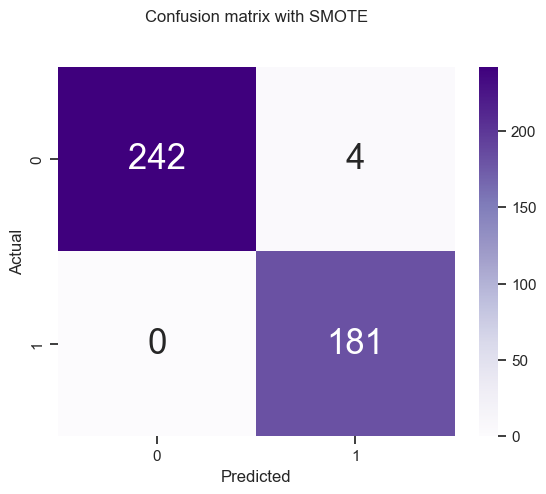

In [99]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Purples" ,fmt='g')

plt.title('Confusion matrix with SMOTE', y=1.1, fontsize = 12)
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)



plt.show()

In [100]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 555, 1: 439})
Resampled dataset shape Counter({1: 556, 0: 555})


In [101]:
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [102]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_adasyn)))

Accuracy :0.99297
AUC : 0.98984
Precision : 0.97312
Recall : 1.00000
F1 : 0.98638
Kappa Statistic : 0.97611


AUC -  0.9898373983739838 



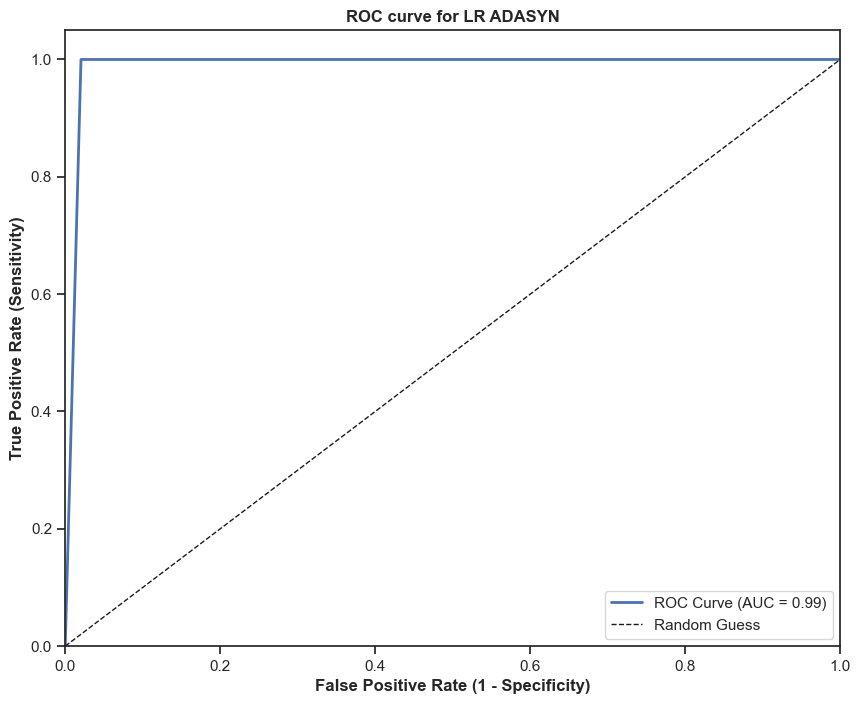

In [103]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12,fontweight='bold')
plt.title('ROC curve for LR ADASYN', fontsize=12,fontweight='bold')

plt.legend(loc="lower right")

plt.show()


f1=0.986


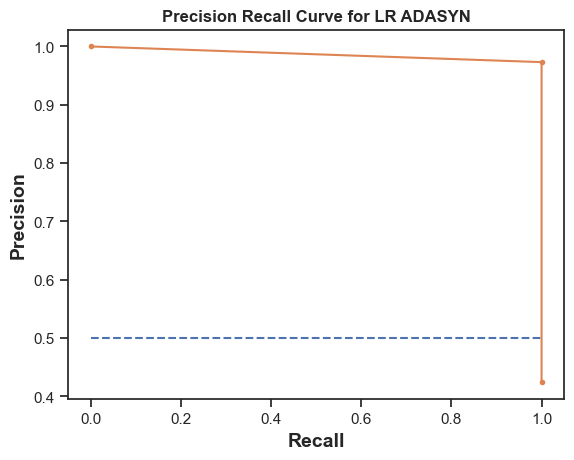

In [104]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR ADASYN', fontsize=12, fontweight='bold')

plt.show()

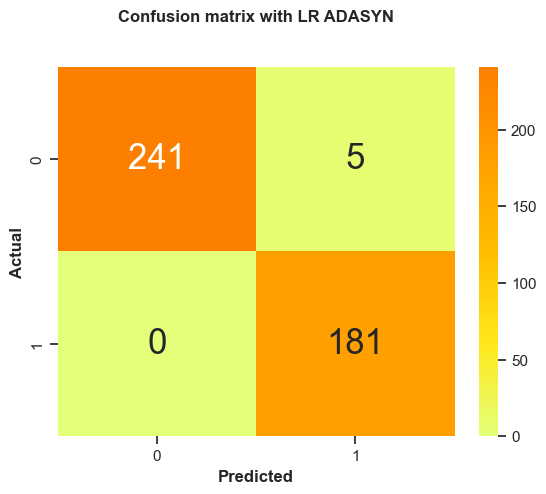

In [105]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Wistia" ,fmt='g')

plt.title('Confusion matrix with LR ADASYN', y=1.1, fontsize = 12,fontweight='bold')
plt.xlabel('Predicted',fontsize = 12,fontweight='bold')
plt.ylabel('Actual',fontsize = 12,fontweight='bold')


plt.show()

In [106]:
# names_lst = []

# aucs_train_lst = []
# accuracy_train_lst = []
# precision_train_lst = []
# recall_train_lst = []
# f1_train_lst = []

# aucs_test_lst = []
# accuracy_test_lst = []
# precision_test_lst = []
# recall_test_lst = []
# f1_test_lst = []
# kappa_lst = []


# def build_measure_model(models):
#     plt.figure(figsize=(12,6))

#     for name, model, X_train, y_train, X_test, y_test in models:
        
#         names_lst.append(name)

#         model.fit(X_train, y_train)
        
#         y_train_pred = model.predict(X_train)
#         y_test_pred = model.predict(X_test)

#         Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
#         accuracy_train_lst.append(Accuracy_train)
        
#         Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
#         accuracy_test_lst.append(Accuracy_test)

#         Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
#         aucs_train_lst.append(Aucs_train)
        
#         Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
#         aucs_test_lst.append(Aucs_test)

#         PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
#         precision_train_lst.append(PrecisionScore_train)
        
#         PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
#         precision_test_lst.append(PrecisionScore_test)

#         RecallScore_train = metrics.recall_score(y_train , y_train_pred)
#         recall_train_lst.append(RecallScore_train)
        
#         RecallScore_test = metrics.recall_score(y_test , y_test_pred)
#         recall_test_lst.append(RecallScore_test)

#         F1Score_train = metrics.f1_score(y_train , y_train_pred)
#         f1_train_lst.append(F1Score_train)
        
#         F1Score_test = metrics.f1_score(y_test , y_test_pred)
#         f1_test_lst.append(F1Score_test)

        
        
#         kappa = cohen_kappa_score(y_test, y_test_pred)
#         kappa_lst.append(kappa)

#         cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)
        
        
        
        

#         print("Model Name :", name)
        
#         print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
#         print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
#         print('Train AUC : {0:0.5f}'.format(Aucs_train))
#         print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
#         print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
#         print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
#         print('Train Recall : {0:0.5f}'.format(RecallScore_train))
#         print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
#         print('Train F1 : {0:0.5f}'.format(F1Score_train))
#         print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        
#         print('Kappa Statistic : {0:0.5f}'.format(kappa))
        
#         print('Confusion Matrix : \n', cnf_matrix)
        
#         print("\n")


#         fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
#         auc = metrics.roc_auc_score(y_test, y_test_pred)
#         plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    


#     plt.legend(loc=4)
#     plt.plot([0,1], [0,1], 'k--' )
#     plt.rcParams['font.size'] = 12
#     plt.xlabel('False Positive Rate (1 - Specificity)')
#     plt.ylabel('True Positive Rate (Sensitivity)')
#     plt.show()

Model Name : SVM imbalance
Train Accuracy :0.98994
Test Accuracy :0.97892
Train AUC : 0.99051
Test AUC : 0.97952
Train Precision : 0.98202
Test Precision : 0.96739
Train Recall : 0.99544
Test Recall : 0.98343
Train F1 : 0.98869
Test F1 : 0.97534
Kappa Statistic : 0.95694
Confusion Matrix : 
 [[240   6]
 [  3 178]]


Model Name : SVM Undersampling
Train Accuracy :0.98975
Test Accuracy :0.97424
Train AUC : 0.98975
Test AUC : 0.97545
Train Precision : 0.98423
Test Precision : 0.95699
Train Recall : 0.99544
Test Recall : 0.98343
Train F1 : 0.98981
Test F1 : 0.97003
Kappa Statistic : 0.94745
Confusion Matrix : 
 [[238   8]
 [  3 178]]


Model Name : SVM Oversampling
Train Accuracy :0.98829
Test Accuracy :0.97190
Train AUC : 0.98829
Test AUC : 0.97342
Train Precision : 0.98050
Test Precision : 0.95187
Train Recall : 0.99640
Test Recall : 0.98343
Train F1 : 0.98838
Test F1 : 0.96739
Kappa Statistic : 0.94271
Confusion Matrix : 
 [[237   9]
 [  3 178]]


Model Name : SVM SMOTE
Train Accuracy :

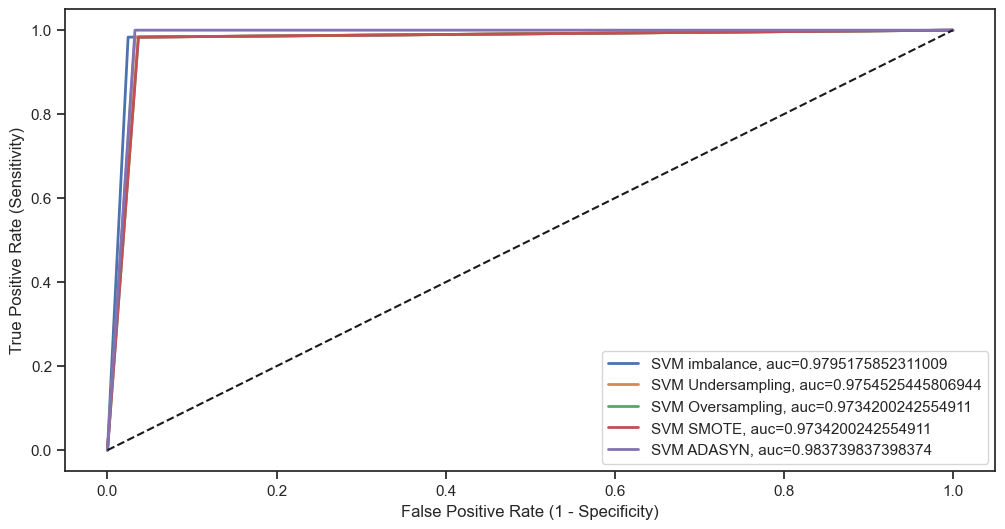

In [110]:
# SVMmodels = []

# SVMmodels.append(('SVM imbalance', SVC(gamma='auto'),X_train,y_train,X_test,y_test))
# SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_train_rus,y_train_rus,X_test,y_test))
# SVMmodels.append(('SVM Oversampling', SVC(gamma='auto'),X_train_ros,y_train_ros,X_test,y_test))
# SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))
# SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# build_measure_model(SVMmodels)